## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. 

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only *after* you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?
2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

Submit your work below, and plan on discussing with your mentor. You can also take a look at this [example solution](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_outliers/solution.ipynb).

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
useducation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [12]:
fill_list = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']

useducation2 = useducation.copy()

for col in fill_list:
    useducation2.loc[:, col] = useducation2.loc[:, col].interpolate()

In [13]:
useducation2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

**Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?**

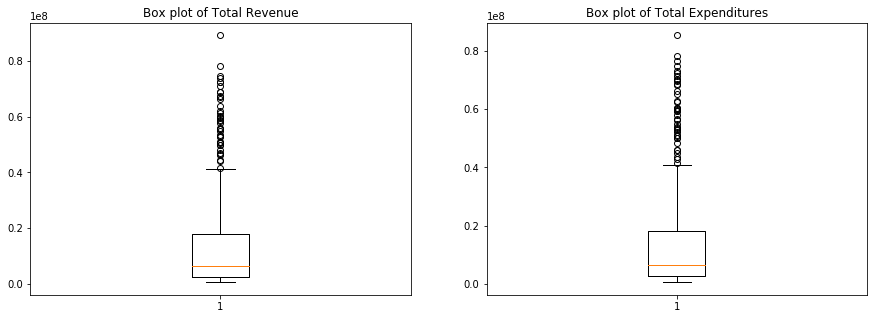

In [15]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(useducation2["TOTAL_REVENUE"])
plt.title("Box plot of Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(useducation2["TOTAL_EXPENDITURE"])
plt.title("Box plot of Total Expenditures")
plt.show()

In [24]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
win_rev = winsorize(useducation2["TOTAL_REVENUE"], (0, 0.05))
win_exp = winsorize(useducation2["TOTAL_EXPENDITURE"], (0, 0.05))

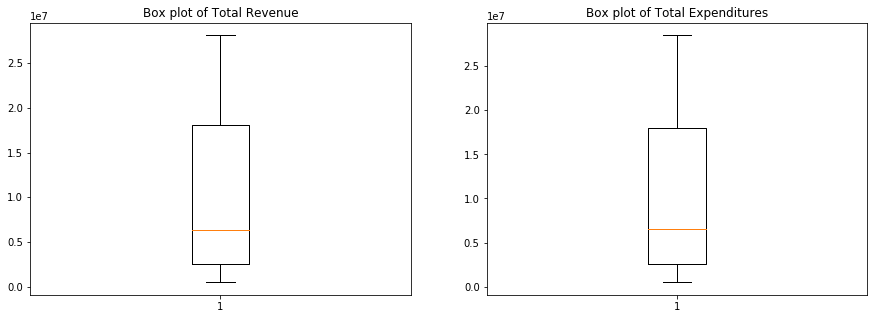

In [25]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(win_rev)
plt.title("Box plot of Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(win_exp)
plt.title("Box plot of Total Expenditures")
plt.show()

**Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.**

Text(0.5, 1.0, 'Box plot of Budget Deficit')

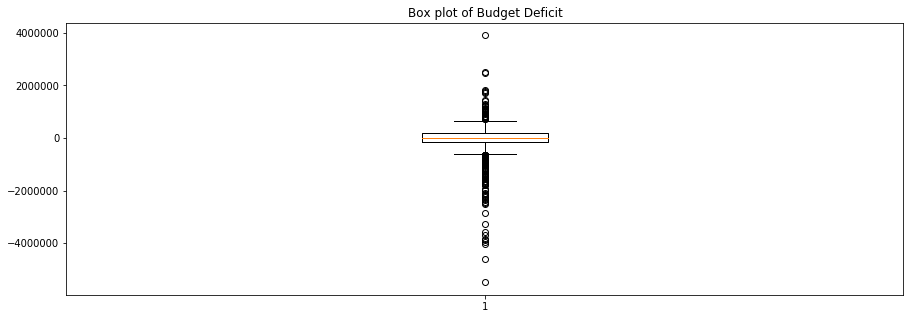

In [28]:
edu_deficit = useducation2['TOTAL_REVENUE'] - useducation2['TOTAL_EXPENDITURE']

plt.figure(figsize = (15,5))

plt.boxplot(edu_deficit)
plt.title("Box plot of Budget Deficit")

Text(0.5, 1.0, 'Box plot of Winsorized Budget Deficit')

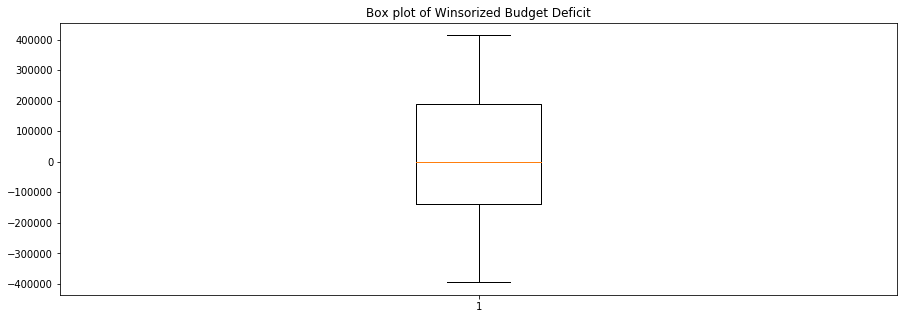

In [36]:
win_deficit = winsorize(edu_deficit, (0.1, 0.1))

plt.figure(figsize = (15,5))

plt.boxplot(win_deficit)
plt.title("Box plot of Winsorized Budget Deficit")

**Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.**

Text(0.5, 1.0, 'Box plot of Budget Deficit')

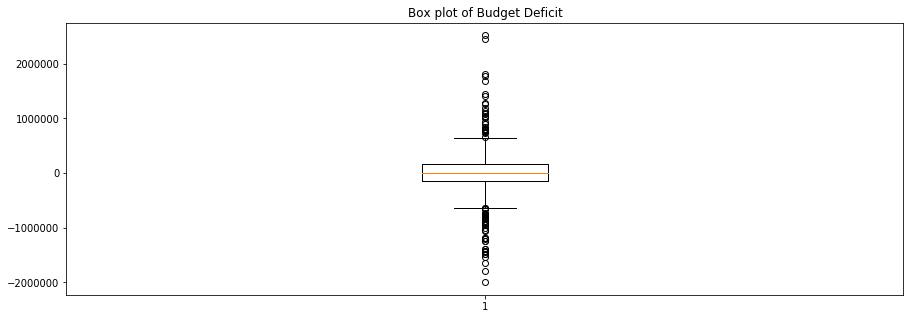

In [37]:
win_deficit = win_rev - win_exp

plt.figure(figsize = (15,5))

plt.boxplot(win_deficit)
plt.title("Box plot of Budget Deficit")

Text(0.5, 1.0, 'Box plot of Winsorized Budget Deficit')

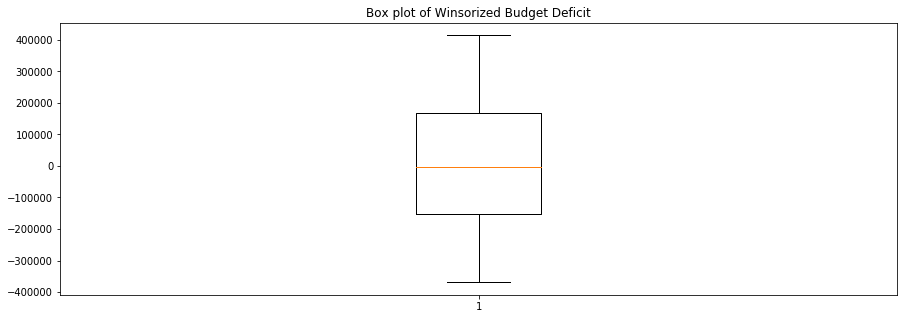

In [39]:
win_win_deficit = winsorize(win_deficit, (0.1, 0.1))

plt.figure(figsize = (15,5))

plt.boxplot(win_win_deficit)
plt.title("Box plot of Winsorized Budget Deficit")

**Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?**

In [40]:
pd.DataFrame({"original_budget": edu_deficit, "winsorized_budget1": win_deficit,
              "winsorized_budget2": win_win_deficit}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,1.492000e+03,1.492000e+03,1492.000000
mean,-3.209622e+04,5.102378e+03,14872.116622
std,5.607748e+05,3.627017e+05,252847.864517
min,-5.487742e+06,-2.000618e+06,-369520.000000
25%,-1.368148e+05,-1.525515e+05,-152551.500000
50%,-5.355000e+02,-3.443500e+03,-3443.500000
75%,1.876285e+05,1.684235e+05,168423.500000
max,3.897129e+06,2.520706e+06,414013.000000
